Lately, I have been on a DataCamp spree after unlocking a two-month free unlimited trial through Microsoft's Visual Studio Dev Essentials program. If you haven't already, make sure to check it out, as it offers a plethora of tools, journal subscriptions, and software packages for developers. Anyhow, one of the courses I decided to check out on DataCamp was titled "Introduction to Deep Learning with Python," which covered basic concepts in deep learning such as forward and backward propagation. The latter half of the tutorial was devoted to the introduction of the Keras framework and the implementation of neural networks with the functional API. I created this notebook immediately after finishing the tutorial for memory retention and self-review purposes.

First, we begin by importing the `keras` library as well as other affiliated functions in the module. Note that Keras uses TensorFlow as backend by default. The warning in the code block below appears because this notebook was written on Google Colab, which informs users that the platform will be switching over to TensorFlow 2 in the future. 

In [0]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

As you might be able to guess from one of the imported modules, the objective of the neural network will be to classify hand-written digits. In doing so, we will be dealing with a classic in machine learning literature known as the the MNIST data set, which contains images of hand-written digits from 0 to 9, each hand-labeled by researchers. The `num_class` variable denotes the total number of class labels available in the classification task, which is 10. `epochs` specifies the number of iterations the gradient descent algorithm will run for. 

In [0]:
num_class = 10
epochs = 15

Let's begin by loading the data from `keras.datasets`.

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Now we have to slightly modify the loaded data so that its dimensions and values are made suitable to be fed into a neural network. Changing the dimensionality of data can be achieved through the `reshape` function, which takes in the number of rows and columns as its argument. We convert the numbes into type `float32`, then normalize it so that its values are all between 0 and 1. Although we won't get into too much detail as to why normalization is important, an elementary intuition we might develop is that normalization effectively squishes all values into the same bound, making data much more processable. We also implement one-hot encoding on `y` through the `keras.utils.to_categorical` function.

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

Let's quickly check if the necessary adjustments were made by looking up the dimensions of `X_train` and `y_train`, respectively.

In [9]:
X_train.shape

(60000, 784)

In [10]:
y_train.shape

(60000, 10)

Looks like the data has been reshaped successfully. Now, it's finally time to get into the nuts and bolts of a neural network. The simplest neural network is the `Sequential` model, which means that every neuron in one layer is connected to all other neurons in the previous layer. Building a simple neural network is extremely easy in a high level API like Keras. The model below has 784 input nodes. The input layer is then connected to a hidden layer with 512 neurons, which is then connected to a second hidden layer with also 512 neurons. Note that the hidden layer uses the `relu` function as its activation function. The dropout layers ensure that our model does not overfit to the data. The last output layer has 10 neurons, each corresponding to digits from 0 to 9. The activation fuction of this last layer is the softmax function, which allows us to interpret the final results as a categorical distribution. 

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_class, activation='softmax'))

Let's double check that the layers have been formed correctly as per our intended design. 

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Everything looks good, which means we are now ready to compile and train our model. Before we do that, however, it is always a good idea to use the `EarlyStopping` module to ensure that gradient descent stops when no substantial weight adjustments are being made to our model. In other words, when the model successfully finds the local minimum (or preferably the global minimum), the `early_stopping_monitor` will kick in and stop gradient descent from proceeding with further epochs. 

In [0]:
early_stopping_monitor = EarlyStopping(patience=2)

We are now ready to go! Let's compile the model by making some configurations, namely the `optimizer`, `loss`, and `metrics`. Simply put, an `optimizer` specifies which flavor of the gradient descent algorithm we want to choose. The simplest version is known as `sgd`, or the stochastic gradient descent. `adam` can be considered an improved version of the stochastic gradient descent in that its learning rate changes depending on the slope of the loss function, defined here as cross entropy. If you recall, cross entropy basically measures the pseudo-distance between two distributions, *i.e.* how different two distributions are. But because cross entropy is often not easy to intuitively wrap our minds around, let's pass the `accuracy` metric to the `compile` function, as shown below.

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

It's time to train the neural network with the training data, `X_train` and `y_train`, over a specified number of epochs. As promised, we will use the `early_stopping_monitor` to stop graident descent from making unnecessary computations down the road. We also specify that `X_test` and `y_test` are components of the validation set. 

In [17]:
history = model.fit(X_train, y_train, epochs=epochs, callbacks=[early_stopping_monitor], validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 129us/step - loss: 0.2149 - acc: 0.9349 - val_loss: 0.0992 - val_acc: 0.9688
Epoch 2/15
60000/60000 [==============================] - 7s 124us/step - loss: 0.1048 - acc: 0.9676 - val_loss: 0.0815 - val_acc: 0.9750
Epoch 3/15
60000/60000 [==============================] - 7s 122us/step - loss: 0.0820 - acc: 0.9743 - val_loss: 0.0907 - val_acc: 0.9726
Epoch 4/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.0669 - acc: 0.9794 - val_loss: 0.0795 - val_acc: 0.9782
Epoch 5/15
60000/60000 [==============================] - 7s 122us/step - loss: 0.0576 - acc: 0.9823 - val_loss: 0.0883 - val_acc: 0.9767
Epoch 6/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.0498 - acc: 0.9843 - val_loss: 0.0704 - val_acc: 0.9799
Epoch 7/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.0470 - acc: 0.9851 - val_loss: 0.0752 - 

Keras shows us how much our neural network improves over each epoch. This is convenient, but can we do better? The answer is a sure yes. Let's quickly plot a graph to see how model accuracy improves over time, while cross entropy loss decreases with more epochs. 

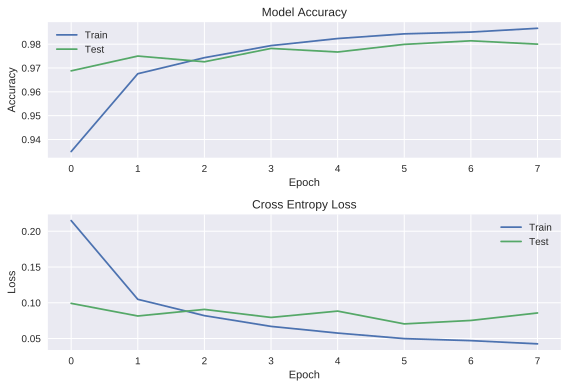

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.tight_layout()

As the last step, we might want to save our trained model. This can be achieved with a single line of code.

In [0]:
model.save('path_to_my_model.h5')

We can load pre-saved models as well.

In [0]:
new_model = keras.models.load_model('path_to_saved_model')

That's it for today! Obviously there are a lot more we can do with `keras`, such as building deeper neural networks or non-sequential models such as CNN or GAN, but these are topics we might look at a later date when I grow more proficient with the Keras API and deep learning in general. For now, consider this to be a gentle introduction to neural networks with Keras. 

Thanks for reading! Catch you up in the next one.